In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from dotenv import load_dotenv
import os
from sqlalchemy import create_engine

In [3]:
load_dotenv()

engine = create_engine(os.getenv("DB_STRING"))

query = 'SELECT * FROM tabela_csv'
df = pd.read_sql(query, engine)

df.head()

,produto,categoria,preco,quantidade_em_estoque
0,region,Eletrônicos,713.72,83
1,popular,Roupas,742.07,20
2,begin,Eletrônicos,307.11,100
3,someone,Livros,496.96,14
4,north,Roupas,289.80,83


In [6]:
df.info()

print(df.describe(),"\n")

print(df.head(10),"\n")

print(f"O DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas.","\n")

print("Valores nulos por coluna:")
print(df.isnull().sum(),"\n")


print("Shape: ", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   produto                1213 non-null   object 
 1   categoria              1213 non-null   object 
 2   preco                  1213 non-null   float64
 3   quantidade_em_estoque  1213 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 38.0+ KB
             preco  quantidade_em_estoque
count  1213.000000            1213.000000
mean    507.871979              49.877988
std     283.344361              28.965439
min      10.040000               1.000000
25%     278.700000              25.000000
50%     511.330000              50.000000
75%     754.300000              75.000000
max     999.460000             100.000000 

     produto    categoria   preco  quantidade_em_estoque
0     region  Eletrônicos  713.72                     83
1    popular       Roupas

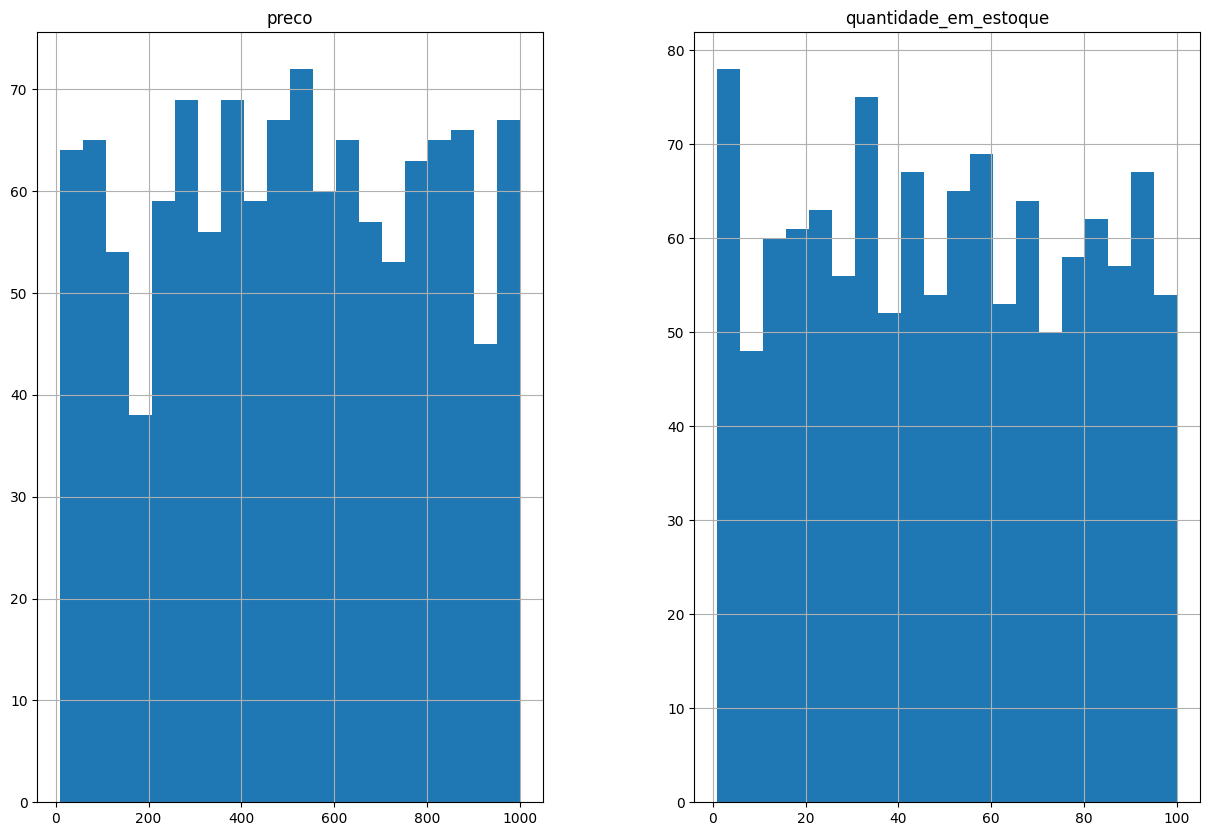

In [10]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

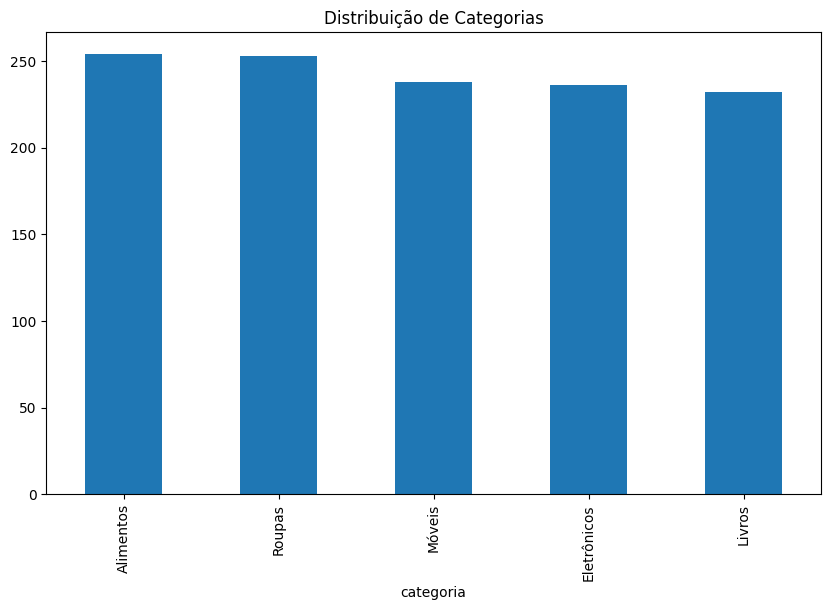

In [13]:
df['categoria'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de Categorias')
plt.show()


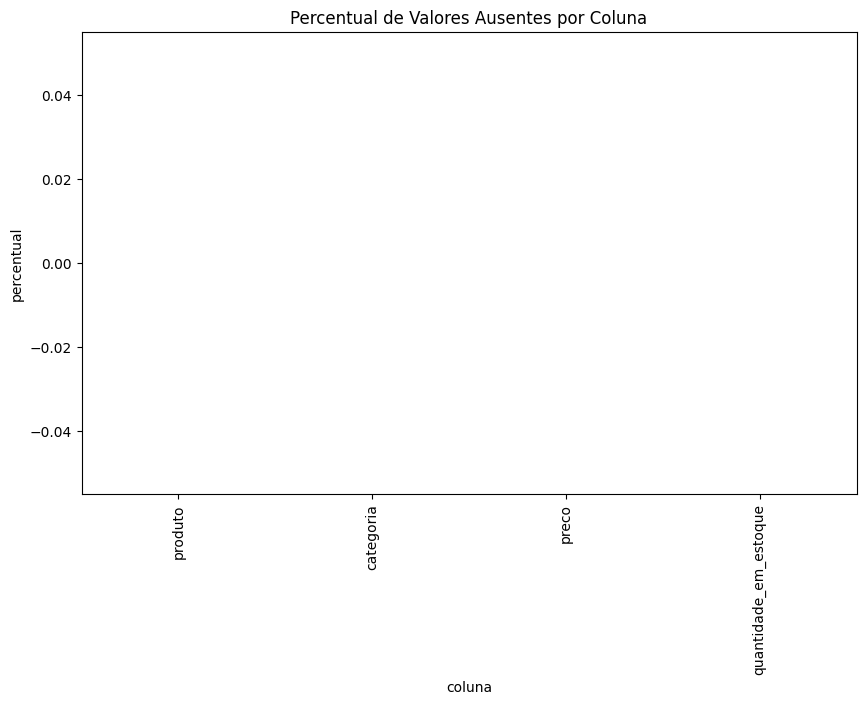

In [14]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'coluna': df.columns, 'percentual': percent_missing})
missing_value_df.sort_values(by='percentual', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='coluna', y='percentual', data=missing_value_df)
plt.xticks(rotation=90)
plt.title('Percentual de Valores Ausentes por Coluna')
plt.show()


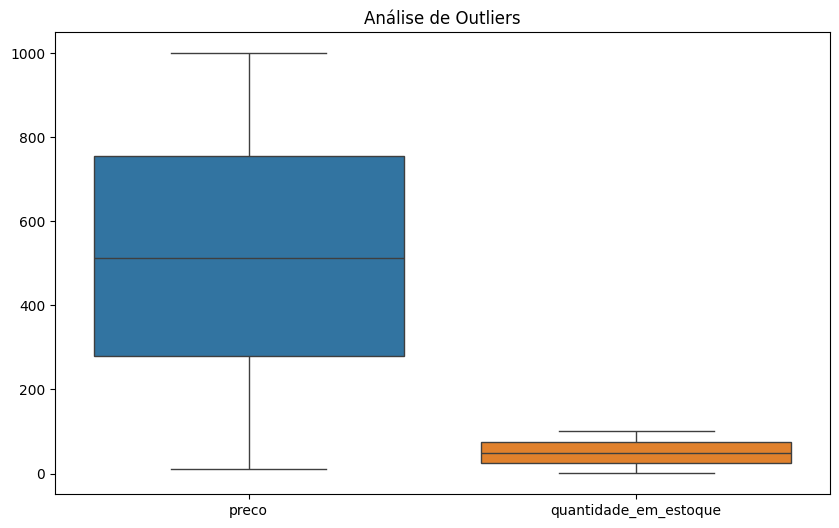

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Análise de Outliers')
plt.show()